In [11]:
import pandas as pd

# Load CSV data from a file
df = pd.read_csv('nasdaq/csv/AHPI.csv')

# Display the DataFrame
df

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,14-01-1992,16.5000,18.000,268050,18.00,17.25,16.136396
1,15-01-1992,17.0000,17.000,192150,19.00,19.00,17.773422
2,16-01-1992,17.0000,19.000,84600,19.00,18.00,16.837975
3,17-01-1992,17.2500,18.000,14500,18.00,17.25,16.136396
4,20-01-1992,17.2500,17.250,30650,18.00,17.25,16.136396
...,...,...,...,...,...,...,...
7783,06-12-2022,1.1200,1.150,13700,1.15,1.13,1.130000
7784,07-12-2022,1.1200,1.120,4000,1.15,1.13,1.130000
7785,08-12-2022,1.0600,1.110,28100,1.11,1.08,1.080000
7786,09-12-2022,0.8800,1.040,79800,1.05,0.96,0.960000


In [1]:
import dask.dataframe as dd
from datetime import timedelta
import tqdm
import pandas as pd
import glob

In [2]:
import pandas as pd
import os
from tqdm import tqdm

def check_csv_columns(directory):
    # List all CSV files in the directory
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

    with tqdm(total=len(csv_files), desc="Checking CSV files") as pbar:
        for file_name in csv_files:
            file_path = os.path.join(directory, file_name)
            try:
                # Read the entire CSV file
                df = pd.read_csv(file_path)

                # Define the required columns
                required_columns = ['Low', 'High', 'Open', 'Close', 'Volume', 'Date','Adjusted Close']

                # Check if all required columns exist
                missing_columns = [col for col in required_columns if col not in df.columns]
                extra_columns = [col for col in df.columns if col not in required_columns]

                if missing_columns:
                    print(f"{file_name} is missing the following columns: {', '.join(missing_columns)}")
                if extra_columns:
                    print(f"{file_name} has extra columns: {', '.join(extra_columns)}")

            except pd.errors.ParserError as e:
                print(f"Parser error in {file_name}: {e}")

            # Update the progress bar
            pbar.update(1)

directory_path = 'nasdaq/csv/'
check_csv_columns(directory_path)


Checking CSV files: 100%|██████████| 1563/1563 [00:11<00:00, 132.23it/s]


In [ ]:
sp = pd.read_csv('nasdaq/csv/LRCX.csv')
sp

In [16]:
# Function to compute some metric (e.g., mean squared error)
def compute_metric(pred, actual):
    return ((pred - actual) ** 2).mean()

# Step 1: Load all CSV files into a Dask DataFrame
file_paths = glob.glob('nasdaq/csv/*.csv')
dfs = [dd.read_csv(file_path) for file_path in file_paths]

# Step 2: Concatenate the DataFrames along the rows
df_combined = dd.concat(dfs, axis=0).compute()

# Step 3: Define candidate intervals
candidate_intervals = ['T', '5T', '10T', 'H', 'D']  # 1 minute, 5 minutes, 10 minutes, hourly, daily

# Initialize variables to store the best interval and corresponding metric
best_interval = None
best_metric = float('inf')



In [2]:
import dask.dataframe as dd
from tqdm import tqdm, trange
import pandas as pd
import os

# Function to load and resample data
def align_and_resample(group, interval):
    resampled_group = group.set_index('Date').resample(interval).last().reset_index()
    return resampled_group

# Step 1: Load CSV files using Dask
directory_path = 'nasdaq/csv/'
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]
dfs = []

for file in tqdm(csv_files):
    company_name = file.split('.')[0]  
    df = dd.read_csv(os.path.join(directory_path, file))
    df['Company'] = company_name
    dfs.append(df)

100%|██████████| 1563/1563 [00:06<00:00, 235.89it/s]


In [3]:
combined_df = dd.concat(dfs).compute()

In [4]:
sample_row = combined_df.head(1)
meta_columns = {
    'Date': 'datetime64[ns]',
    'Volume': 'int64',
    'Low': 'float64',
    'Open': 'float64',
    'High': 'float64',
    'Close': 'float64',
    'Adjusted_Close': 'float64'
}
meta = sample_row.assign(**meta_columns).reset_index(drop=True)

In [7]:
print(combined_df.columns)

Index(['Date', 'Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close',
       'Company'],
      dtype='object')


In [4]:
combined_df['Date'] = pd.to_datetime(combined_df['Date'],dayfirst=True)

In [5]:
combined_df

,Date,Low,Open,Volume,High,Close,Adjusted Close,Company
0,2006-01-30,22.000000,22.000000,0.0,22.000000,22.000000,15.853610,TCFC
1,2006-01-31,22.000000,22.000000,0.0,22.000000,22.000000,15.853610,TCFC
2,2006-02-01,22.000000,22.000000,0.0,22.000000,22.000000,15.853610,TCFC
3,2006-02-02,21.700001,21.700001,300.0,21.700001,21.700001,15.637417,TCFC
4,2006-02-03,21.700001,21.700001,0.0,21.700001,21.700001,15.637417,TCFC
...,...,...,...,...,...,...,...,...
4751,2022-12-06,2.620000,2.800000,91000.0,2.800000,2.620000,2.620000,ADES
4752,2022-12-07,2.620000,2.620000,70800.0,2.990000,2.680000,2.680000,ADES
4753,2022-12-08,2.610000,2.660000,53400.0,2.810000,2.640000,2.640000,ADES
4754,2022-12-09,2.500000,2.600000,107000.0,2.650000,2.540000,2.540000,ADES


In [7]:
from tqdm import tqdm
import dask.dataframe as dd

# Define the candidate intervals
candidate_intervals = ['min', '5T', '10T', '30T','H', 'D', 'W', 'M']  # Daily, Weekly, Monthly intervals

best_interval = None
best_metric = float('inf')

combined_ddf = dd.from_pandas(combined_df, npartitions=8)  

total_volume = dd.from_pandas(combined_df.groupby('Company')['Volume'].sum().reset_index(), npartitions=1)

for interval in tqdm(candidate_intervals):
    aligned_dfs = combined_ddf.groupby(['Company', 'Date']).apply(
        lambda group, ivl=interval: align_and_resample(group, ivl),
        meta={'Company': str, 'Date': 'datetime64[ns]', 'Volume': float}
    ).compute()

    # Calculate total volume for each company
    current_total_volume = aligned_dfs.groupby('Company')['Volume'].sum().reset_index()
    print(f"Total Volume for {interval}:")
    print(current_total_volume)

    # Accumulate the total volume
    total_volume += current_total_volume.set_index('Company')['Volume']

# Convert back to pandas DataFrame
total_volume = total_volume.compute()

# Determine the optimal interval based on some metric (e.g., max volume)
optimal_interval = total_volume['Volume'].idxmax()
print(f'Optimal Interval: {candidate_intervals[optimal_interval]}')

  0%|          | 0/8 [24:01<?, ?it/s]


In [6]:
ddf=combined_df

In [10]:
ddf = ddf.sort_values('Date')

# Save the result to a single CSV file
ddf.to_csv('nasdaq.csv', index=False)

print("Processing complete. Data saved to 'combined_nasdaq_data.csv'")

Processing complete. Data saved to 'combined_nasdaq_data.csv'


In [12]:
df = ddf

In [13]:
df

,Date,Low,Open,Volume,High,Close,Adjusted Close,Company
0,1970-01-02,15.125000,15.375000,64600.0,15.875000,15.750000,3.402411,GT
1,1970-01-05,15.250000,15.687500,47200.0,15.687500,15.437500,3.334903,GT
2,1970-01-06,14.750000,15.187500,122000.0,15.187500,15.000000,3.240391,GT
3,1970-01-07,14.625000,14.937500,45600.0,14.937500,14.812500,3.199885,GT
4,1970-01-08,14.625000,14.812500,50400.0,14.937500,14.750000,3.186385,GT
...,...,...,...,...,...,...,...,...
4727,2022-12-12,NaN,NaN,NaN,NaN,NaN,NaN,CSBK
7224,2022-12-12,2.170000,2.180000,575.0,2.180000,2.170000,2.170000,DWSN
5586,2022-12-12,3.560000,3.620000,3837.0,3.624300,3.560000,3.560000,DRRX
5996,2022-12-12,22.559999,22.559999,1411.0,22.940001,22.940001,22.940001,MTEX


In [14]:
df = df[(df['Volume'] != 0) & ~df.isnull().any(axis=1)]
df

,Date,Low,Open,Volume,High,Close,Adjusted Close,Company
0,1970-01-02,15.125000,15.375000,64600.0,15.875000,15.750000,3.402411,GT
1,1970-01-05,15.250000,15.687500,47200.0,15.687500,15.437500,3.334903,GT
2,1970-01-06,14.750000,15.187500,122000.0,15.187500,15.000000,3.240391,GT
3,1970-01-07,14.625000,14.937500,45600.0,14.937500,14.812500,3.199885,GT
4,1970-01-08,14.625000,14.812500,50400.0,14.937500,14.750000,3.186385,GT
...,...,...,...,...,...,...,...,...
9893,2022-12-12,181.229996,182.240005,146693.0,188.270004,188.130005,188.130005,CAR
7224,2022-12-12,2.170000,2.180000,575.0,2.180000,2.170000,2.170000,DWSN
5586,2022-12-12,3.560000,3.620000,3837.0,3.624300,3.560000,3.560000,DRRX
5996,2022-12-12,22.559999,22.559999,1411.0,22.940001,22.940001,22.940001,MTEX


In [18]:
df.describe()

,Date,Low,Open,Volume,High,Close,Adjusted Close
count,8023350,8.023350e+06,8.023350e+06,8.023350e+06,8.023350e+06,8.023350e+06,8.023350e+06
mean,2009-04-15 09:37:05.537514240,4.035688e+02,4.212505e+02,1.594904e+06,4.391006e+02,4.203780e+02,3.798613e+02
min,1970-01-02 00:00:00,1.000000e-06,0.000000e+00,1.000000e+00,1.000000e-06,1.000000e-06,-1.018476e+02
25%,2003-01-13 00:00:00,5.560000e+00,5.400000e+00,1.100000e+04,5.843460e+00,5.700000e+00,4.526343e+00
50%,2011-01-11 00:00:00,1.362000e+01,1.372000e+01,7.364000e+04,1.413000e+01,1.388889e+01,1.114000e+01
75%,2017-02-23 00:00:00,2.949000e+01,2.982500e+01,3.819000e+05,3.050000e+01,3.000000e+01,2.620408e+01
max,2022-12-12 00:00:00,8.139600e+06,9.180000e+06,7.421641e+09,9.333000e+06,8.996400e+06,8.996400e+06
std,NaN,1.581869e+04,1.723439e+04,1.910353e+07,1.845774e+04,1.698096e+04,1.613479e+04


In [21]:
df

,Date,Low,Open,Volume,High,Close,Adjusted Close,Company
0,1970-01-02,15.125000,15.375000,64600.0,15.875000,15.750000,3.402411,GT
1,1970-01-05,15.250000,15.687500,47200.0,15.687500,15.437500,3.334903,GT
2,1970-01-06,14.750000,15.187500,122000.0,15.187500,15.000000,3.240391,GT
3,1970-01-07,14.625000,14.937500,45600.0,14.937500,14.812500,3.199885,GT
4,1970-01-08,14.625000,14.812500,50400.0,14.937500,14.750000,3.186385,GT
...,...,...,...,...,...,...,...,...
9893,2022-12-12,181.229996,182.240005,146693.0,188.270004,188.130005,188.130005,CAR
7224,2022-12-12,2.170000,2.180000,575.0,2.180000,2.170000,2.170000,DWSN
5586,2022-12-12,3.560000,3.620000,3837.0,3.624300,3.560000,3.560000,DRRX
5996,2022-12-12,22.559999,22.559999,1411.0,22.940001,22.940001,22.940001,MTEX


In [22]:
def create_order_book(df):
    order_book = []
    
    for _, row in df.iterrows():
        book_entry = {
            'Date': row['Date'],
            'Company': row['Company'],
            'Open': row['Open'],
            'Close': row['Close'],
            'Low': row['Low'],
            'High': row['High'],
            'Volume': row['Volume'],
            'Bid_Price': row['Low'],
            'Ask_Price': row['High'],
            'Mid_Price': (row['Low'] + row['High']) / 2,
            'Spread': row['High'] - row['Low'],
        }
        order_book.append(book_entry)
    
    return pd.DataFrame(order_book)


In [23]:
df_dask = dd.from_pandas(df, npartitions=8)

In [25]:
order_book_df = df_dask.map_partitions(create_order_book).compute()

# Save the order book
order_book_df.to_csv('order_book.csv', index=False)
print("Order book created and saved to 'nasdaq_order_book.csv'")

Order book created and saved to 'nasdaq_order_book.csv'


In [26]:
df = order_book_df

In [2]:
import pandas as pd

# Load CSV data from a file
df = pd.read_csv('order_book.csv')

# Display the DataFrame
df

,Date,Company,Open,Close,Low,High,Volume,Bid_Price,Ask_Price,Mid_Price,Spread
0,1970-01-02,GT,15.375000,15.750000,15.125000,15.875000,64600.0,15.125000,15.875000,15.500000,0.750000
1,2004-08-23,JXSB,15.260000,15.250000,15.250000,15.260000,1000.0,15.250000,15.260000,15.255000,0.010000
2,2004-08-27,FFA,20.000000,20.000000,20.000000,20.010000,368300.0,20.000000,20.010000,20.005000,0.010000
3,1998-07-10,BELFB,10.000000,9.625000,9.625000,10.000000,24800.0,9.625000,10.000000,9.812500,0.375000
4,1995-10-13,POOL,0.921811,0.921811,0.921811,0.987654,6328631.0,0.921811,0.987654,0.954732,0.065843
...,...,...,...,...,...,...,...,...,...,...,...
8023345,2022-12-06,GT,10.830000,10.670000,10.500000,10.890000,3740000.0,10.500000,10.890000,10.695000,0.390000
8023346,2022-12-07,GT,10.590000,10.650000,10.520000,10.660000,2331900.0,10.520000,10.660000,10.590000,0.139999
8023347,2022-12-08,GT,10.740000,10.650000,10.590000,10.840000,2425100.0,10.590000,10.840000,10.715000,0.250000
8023348,2022-12-09,GT,10.530000,10.520000,10.520000,10.730000,2242800.0,10.520000,10.730000,10.625000,0.209999


In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Company'] = le.fit_transform(df['Company'])

In [2]:
import torch
import warnings
# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: cuda


In [4]:
df

,Date,Company,Open,Close,Low,High,Volume,Bid_Price,Ask_Price,Mid_Price,Spread
0,1970-01-02,652,15.375000,15.750000,15.125000,15.875000,64600.0,15.125000,15.875000,15.500000,0.750000
1,2004-08-23,802,15.260000,15.250000,15.250000,15.260000,1000.0,15.250000,15.260000,15.255000,0.010000
2,2004-08-27,536,20.000000,20.000000,20.000000,20.010000,368300.0,20.000000,20.010000,20.005000,0.010000
3,1998-07-10,179,10.000000,9.625000,9.625000,10.000000,24800.0,9.625000,10.000000,9.812500,0.375000
4,1995-10-13,1131,0.921811,0.921811,0.921811,0.987654,6328631.0,0.921811,0.987654,0.954732,0.065843
...,...,...,...,...,...,...,...,...,...,...,...
8023345,2022-12-06,652,10.830000,10.670000,10.500000,10.890000,3740000.0,10.500000,10.890000,10.695000,0.390000
8023346,2022-12-07,652,10.590000,10.650000,10.520000,10.660000,2331900.0,10.520000,10.660000,10.590000,0.139999
8023347,2022-12-08,652,10.740000,10.650000,10.590000,10.840000,2425100.0,10.590000,10.840000,10.715000,0.250000
8023348,2022-12-09,652,10.530000,10.520000,10.520000,10.730000,2242800.0,10.520000,10.730000,10.625000,0.209999


In [1]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import torch
from torch_geometric.data import Data
from tqdm.auto import tqdm
import h5py
import dask.dataframe as dd


In [6]:
def create_compact_graph(group):
    # Convert group to a Dask DataFrame
    dgroup = dd.from_pandas(group, npartitions=12)

    # Node features: Open, Close, Low, High, Volume
    node_features = dgroup[['Open', 'Close', 'Low', 'High', 'Volume']].to_dask_array(lengths=True).astype(np.float32)
    
    # Edge index: Fully connected graph
    num_nodes = len(group)
    row = np.repeat(np.arange(num_nodes), num_nodes)
    col = np.tile(np.arange(num_nodes), num_nodes)
    
    # Edge attributes: Time difference and price difference
    times = pd.to_datetime(dgroup['Date'].compute()).astype(int) // 10**9
    times_array = times.to_numpy()  # Convert to NumPy array
    time_diff = np.abs(times_array[:, None] - times_array).ravel()  # Use NumPy array for indexing
    price_diff = np.abs(dgroup['Close'].compute().to_numpy()[:, None] - dgroup['Close'].compute().to_numpy()).ravel()
    
    # Create sparse matrices for edge_index and edge_attr
    edge_index = csr_matrix((np.ones_like(row), (row, col)), shape=(num_nodes, num_nodes))
    edge_attr = np.column_stack((time_diff, price_diff))
    
    # Target: Next day's closing price
    y = dgroup['Close'].shift(-1).dropna().compute().values.astype(np.float32)
    
    return {
        'node_features': node_features,
        'edge_index': edge_index,
        'edge_attr': edge_attr,
        'y': y
    }
    
def save_compact_graphs(df, file_path):
    # Convert to Dask DataFrame with appropriate partitions
    ddf = dd.from_pandas(df, npartitions=12)

    with h5py.File(file_path, 'w') as f:
        unique_companies = ddf['Company'].unique().compute()  # Get unique companies
        
        for company in tqdm(unique_companies, desc="Processing Companies"):  # Add tqdm for progress bar
            group = ddf[ddf['Company'] == company]  # Filter for each company
            compact_graph = create_compact_graph(group.compute())  # Compute the group
            
            company_group = f.create_group(company)
            # Use compression for datasets
            company_group.create_dataset('node_features', data=compact_graph['node_features'], compression='gzip')
            company_group.create_dataset('edge_index_data', data=compact_graph['edge_index'].data, compression='gzip')
            company_group.create_dataset('edge_index_indices', data=compact_graph['edge_index'].indices, compression='gzip')
            company_group.create_dataset('edge_index_indptr', data=compact_graph['edge_index'].indptr, compression='gzip')
            company_group.create_dataset('edge_attr', data=compact_graph['edge_attr'], compression='gzip')
            company_group.create_dataset('y', data=compact_graph['y'], compression='gzip')

In [7]:
file_path = 'compact_graphs_dask.h5'
save_compact_graphs(df, file_path)

Processing Companies:   0%|          | 0/1562 [00:00<?, ?it/s]

In [2]:
def load_compact_graph(file_path, company):
    with h5py.File(file_path, 'r') as f:
        company_group = f[company]
        node_features = torch.tensor(company_group['node_features'][:])
        edge_index = csr_matrix((company_group['edge_index_data'][:],
                                 company_group['edge_index_indices'][:],
                                 company_group['edge_index_indptr'][:]))
        edge_attr = torch.tensor(company_group['edge_attr'][:], dtype=torch.float)
        y = torch.tensor(company_group['y'][:])
        
        # Convert to PyTorch Geometric Data object
        edge_index = torch.tensor(edge_index.nonzero(), dtype=torch.long)
        
        return Data(x=node_features, edge_index=edge_index, edge_attr=edge_attr, y=y)

In [1]:
import h5py
import numpy as np

# Load the HDF5 file
file_path = 'compact_graphs_dask.h5'  # Replace with your file path
with h5py.File(file_path, 'r') as f:
    # List all groups (companies)
    print("Available companies:", list(f.keys()))

    # Example: Load data for a specific company
    company_name = 'AAL'  # Replace with the desired company name
    
    if company_name in f:
        company_group = f[company_name]
        
        # Load datasets
        node_features = company_group['node_features'][:]
        edge_index_data = company_group['edge_index_data'][:]
        edge_index_indices = company_group['edge_index_indices'][:]
        edge_index_indptr = company_group['edge_index_indptr'][:]
        edge_attr = company_group['edge_attr'][:]
        y = company_group['y'][:]

        # Print loaded data shapes or contents
        print("Node Features Shape:", node_features.shape)
        print("Edge Index Data Shape:", edge_index_data.shape)
        print("Edge Attributes Shape:", edge_attr.shape)
        print("Target Shape:", y.shape)
    else:
        print(f"Company '{company_name}' not found in the file.")

Available companies: ['AAL', 'AAME', 'AAOI', 'AAON', 'AAPL', 'AAVL', 'AAWW', 'ABCB', 'ABCD', 'ABCO', 'ABIO', 'ABMD', 'ACAD', 'ACET', 'ACFC', 'ACFN', 'ACGL', 'ACHC', 'ACHN', 'ACIW', 'ACLS', 'ACNB', 'ACOR', 'ACRX', 'ACST', 'ACTA', 'ACTG', 'ACUR', 'ADBE', 'ADES', 'ADI', 'ADMA', 'ADMP', 'ADP', 'ADSK', 'ADTN', 'ADUS', 'ADXS', 'AEHR', 'AEIS', 'AELTF', 'AERI', 'AEY', 'AEZS', 'AFAM', 'AFCB', 'AFMD', 'AFSI', 'AGEN', 'AGIO', 'AGRX', 'AGTC', 'AGYS', 'AHGP', 'AHPI', 'AIMC', 'AIQ', 'AIRT', 'AJISF', 'AKAM', 'AKBA', 'ALCO', 'ALDX', 'ALGN', 'ALGT', 'ALIM', 'ALKS', 'ALLT', 'ALNY', 'ALOG', 'ALSD', 'AMAT', 'AMBA', 'AMBC', 'AMCF', 'AMCX', 'AMD', 'AMED', 'AMGN', 'AMKR', 'AMNB', 'AMOT', 'AMPH', 'AMRN', 'AMRS', 'AMSC', 'AMSWA', 'AMTX', 'AMWD', 'AMX', 'AMZN', 'ANAC', 'ANCB', 'ANCX', 'ANDE', 'ANGI', 'ANGO', 'ANIK', 'ANIP', 'ANTH', 'ANY', 'AOSL', 'APDN', 'APEI', 'APOG', 'APTO', 'APWC', 'ARAY', 'ARCB', 'ARCC', 'ARCK', 'ARCW', 'ARDX', 'ARII', 'ARIS', 'ARKR', 'ARLP', 'AROW', 'ARRY', 'ARTNA', 'ASMB', 'ASML', 'ASPS'

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import torch
from torch_geometric.data import Data


Graph 0:
Number of nodes: 2247
Number of edges: 5049009
Node features shape: torch.Size([2247, 5])
Edge features shape: torch.Size([5049009, 2])
Graph labels: [ 4.09  4.8   4.76 ... 14.48 14.48 14.48]

Sample node features:
tensor([[4.0000e+00, 3.6500e+00, 3.6500e+00, 4.0000e+00, 3.0000e+03],
        [4.0000e+00, 4.0900e+00, 3.6950e+00, 1.5000e+01, 3.7000e+03],
        [4.9100e+00, 4.8000e+00, 4.3000e+00, 4.9100e+00, 8.3000e+03],
        [4.7500e+00, 4.7600e+00, 4.7400e+00, 4.7600e+00, 4.4000e+03],
        [3.7800e+00, 4.5100e+00, 3.7400e+00, 4.5100e+00, 5.0000e+02]])

Sample edge features:
tensor([[0.0000e+00, 0.0000e+00],
        [8.6400e+04, 4.4000e-01],
        [1.7280e+05, 1.1500e+00],
        [4.3200e+05, 1.1100e+00],
        [5.1840e+05, 8.6000e-01]])


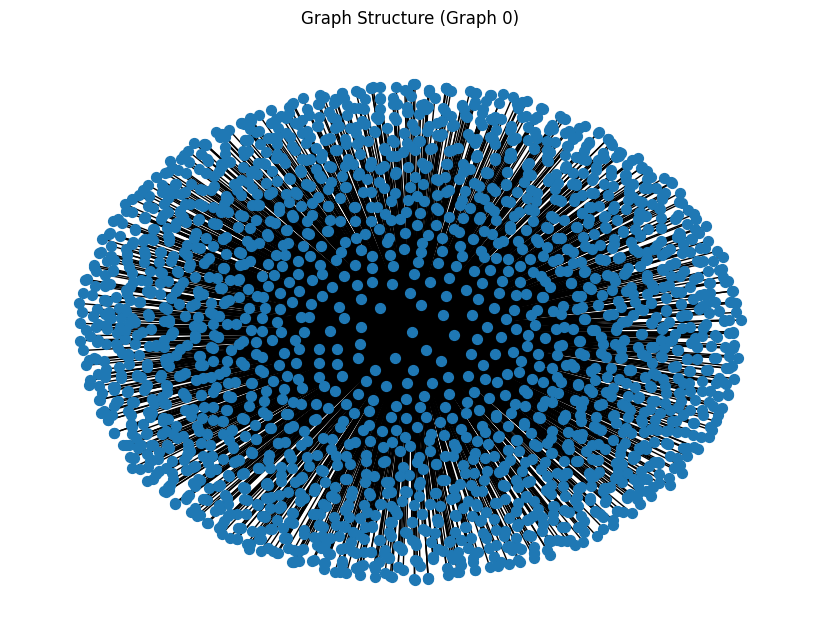

In [5]:

def inspect_graph(graph, index):
    print(f"Graph {index}:")
    print(f"Number of nodes: {graph.num_nodes}")
    print(f"Number of edges: {graph.num_edges}")
    print(f"Node features shape: {graph.x.shape}")
    print(f"Edge features shape: {graph.edge_attr.shape}")

    # Check if graph.y is a single value or multiple values
    if graph.y.numel() == 1:
        print(f"Graph label: {graph.y.item()}")
    else:
        print(f"Graph labels: {graph.y.numpy()}")  # Convert to NumPy array for better display

    # Print first few node features
    print("\nSample node features:")
    print(graph.x[:5])
    
    # Print first few edge features
    print("\nSample edge features:")
    print(graph.edge_attr[:5])
    
    # Visualize graph structure (this will be a dense graph due to full connectivity)
    G = nx.Graph()
    G.add_edges_from(graph.edge_index.t().tolist())
    
    plt.figure(figsize=(8, 6))
    nx.draw(G, node_size=50, with_labels=False)
    plt.title(f"Graph Structure (Graph {index})")
    plt.show()


# Load graph data from HDF5 file
file_path = 'compact_graphs_dask.h5'  # Replace with your file path
company_name = 'ABCD'  # Replace with the desired company name

with h5py.File(file_path, 'r') as f:
    if company_name in f:
        company_group = f[company_name]
        
        # Load datasets into PyTorch Geometric Data object
        node_features = torch.tensor(company_group['node_features'][:], dtype=torch.float32)
        edge_index = torch.tensor(np.vstack((company_group['edge_index_indices'][:], 
                                              company_group['edge_index_data'][:])).astype(np.int64), dtype=torch.long)
        edge_attr = torch.tensor(company_group['edge_attr'][:], dtype=torch.float32)
        y = torch.tensor(company_group['y'][:], dtype=torch.float32)

        # Create a PyTorch Geometric Data object
        graph = Data(x=node_features, edge_index=edge_index, edge_attr=edge_attr, y=y)

        # Inspect the loaded graph
        inspect_graph(graph, 0)  # Inspect the first graph

In [3]:
# from torch_geometric.data import Data, DataLoader
# from sklearn.model_selection import train_test_split

# # Load all graphs from HDF5 file
# file_path = 'compact_graphs_dask.h5'  # Replace with your file path
# graphs_by_company = {}

# with h5py.File(file_path, 'r') as f:
#     for company_name in f.keys():
#         company_group = f[company_name]
        
#         # Load datasets into PyTorch Geometric Data object
#         node_features = torch.tensor(company_group['node_features'][:], dtype=torch.float32)
#         edge_index = torch.tensor(np.vstack((company_group['edge_index_indices'][:], 
#                                               company_group['edge_index_data'][:])).astype(np.int64), dtype=torch.long)
#         edge_attr = torch.tensor(company_group['edge_attr'][:], dtype=torch.float32)
#         y = torch.tensor(company_group['y'][:], dtype=torch.float32)

#         # Create a PyTorch Geometric Data object
#         graph = Data(x=node_features, edge_index=edge_index, edge_attr=edge_attr, y=y)
        
#         # Append graph to the corresponding company list
#         if company_name not in graphs_by_company:
#             graphs_by_company[company_name] = []
#         graphs_by_company[company_name].append(graph)

# # Step 1: Flatten the list of graphs
# all_graphs = []
# for company_graphs in graphs_by_company.values():
#     all_graphs.extend(company_graphs)

# # Step 2: Split into training and validation sets
# train_graphs, val_graphs = train_test_split(all_graphs, test_size=0.2, random_state=42)  # Adjust test_size as needed

# # Step 3: Create DataLoaders with shuffling disabled for temporal data
# train_loader = DataLoader(train_graphs, batch_size=64, shuffle=False)  # Adjust batch size as needed
# val_loader = DataLoader(val_graphs, batch_size=64, shuffle=False)  # Validation usually doesn't need shuffling



In [ ]:
# Example usage:
for batch in train_loader:
    print(batch)
    break

In [3]:
def load_graphs_from_hdf5(file_path, num_companies):
    graphs_by_company = {}
    
    with h5py.File(file_path, 'r') as f:
        company_names = list(f.keys())
        
        # Load only a specified number of companies
        for company_name in company_names[:num_companies]:
            company_group = f[company_name]
            
            # Print to check progress
            print(f"Loading data for company: {company_name}")
            
            # Load datasets into a dictionary
            node_features = company_group['node_features'][:]
            edge_index_indices = company_group['edge_index_indices'][:]
            edge_index_data = company_group['edge_index_data'][:]
            edge_attr = company_group['edge_attr'][:]
            y = company_group['y'][:]

            # Store raw data for later conversion
            graphs_by_company[company_name] = {
                'node_features': node_features,
                'edge_index_indices': edge_index_indices,
                'edge_index_data': edge_index_data,
                'edge_attr': edge_attr,
                'y': y
            }
    
    print("Data loading complete.")
    return graphs_by_company

# Example usage:
file_path = 'compact_graphs_dask.h5'  # Replace with your file path
loaded_graphs = load_graphs_from_hdf5(file_path, num_companies=5) 

Loading data for company: AAL
Loading data for company: AAME
Loading data for company: AAOI
Loading data for company: AAON
Loading data for company: AAPL
Data loading complete.


In [4]:
def convert_to_pytorch_geometric(loaded_graphs):
    all_graphs = []

    for company_name, graph_data in loaded_graphs.items():
        # Create edge_index by stacking indices and data
        edge_index = torch.tensor(np.vstack((graph_data['edge_index_indices'], 
                                              graph_data['edge_index_data'])).astype(np.int64), dtype=torch.long)

        # Create a PyTorch Geometric Data object
        graph = Data(
            x=torch.tensor(graph_data['node_features'], dtype=torch.float32),
            edge_index=edge_index,
            edge_attr=torch.tensor(graph_data['edge_attr'], dtype=torch.float32),
            y=torch.tensor(graph_data['y'], dtype=torch.float32)
        )
        
        all_graphs.append(graph)

    print(f"Converted {len(all_graphs)} graphs to PyTorch Geometric Data objects.")
    return all_graphs

# Convert loaded data
all_graphs = convert_to_pytorch_geometric(loaded_graphs)

Converted 5 graphs to PyTorch Geometric Data objects.


In [5]:
from sklearn.model_selection import train_test_split

# Split into training and validation sets
train_graphs, val_graphs = train_test_split(all_graphs, test_size=0.2, random_state=42) 

print(f"Training graphs: {len(train_graphs)}, Validation graphs: {len(val_graphs)}")

Training graphs: 4, Validation graphs: 1


In [7]:
from torch_geometric.loader import DataLoader

# Create DataLoaders with shuffling disabled for temporal data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=False)  # Adjust batch size as needed
val_loader = DataLoader(val_graphs, batch_size=64, shuffle=False)  # Validation usually doesn't need shuffling

# Example usage:
for batch in train_loader:
    print(batch)
    break  # Just print the first batch for inspection

DataBatch(x=[24782, 5], edge_index=[2, 193135810], edge_attr=[193135810, 2], y=[24778], batch=[24782], ptr=[5])


In [1]:
import h5py
import numpy as np
import torch
from torch_geometric.data import Data

def load_graphs_from_hdf5(file_path, num_companies):
    graphs_by_company = {}
    
    with h5py.File(file_path, 'r') as f:
        company_names = list(f.keys())
        
        # Load only a specified number of companies
        for company_name in company_names[:num_companies]:
            company_group = f[company_name]
            
            print(f"Loading data for company: {company_name}")
            
            # Load datasets into a dictionary
            node_features = company_group['node_features'][:]
            edge_index_indices = company_group['edge_index_indices'][:]
            edge_index_data = company_group['edge_index_data'][:]
            edge_attr = company_group['edge_attr'][:]
            y = company_group['y'][:]

            graphs_by_company[company_name] = {
                'node_features': node_features,
                'edge_index_indices': edge_index_indices,
                'edge_index_data': edge_index_data,
                'edge_attr': edge_attr,
                'y': y
            }
    
    print("Data loading complete.")
    return graphs_by_company

In [23]:
import torch.nn as nn
from torch_geometric.nn import GDC, GATv2Conv, global_mean_pool
import torch.nn.functional as F
class EnhancedDeepStockTradingModel(nn.Module):
    def __init__(self, num_node_features, num_stocks):
        super(EnhancedDeepStockTradingModel, self).__init__()
        # Diffusion Convolution Layers
        self.conv1 = GDC(num_node_features, 64)
        self.conv2 = GDC(64, 128)
        self.conv3 = GDC(128, 256)
        self.conv4 = GDC(256, 512)
        self.conv5 = GDC(512, 512)
        
        # GATv2 Layers
        self.gat1 = GATv2Conv(512, 512, edge_dim=2)
        self.gat2 = GATv2Conv(512, 512, edge_dim=2)
        
        # Activation Function
        self.gelu = nn.GELU()
        
        # Dropout Layer
        self.dropout = nn.Dropout(p=0.5)
        
        # Fully Connected Layers
        self.fc1 = nn.Linear(512, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        
        # Output Layers
        self.action_head = nn.Linear(64, 3)  # Hold, Buy, Sell
        self.value_head = nn.Linear(64, 1)  # Estimated value of the action
        self.quantity_head = nn.Linear(64, 1)  # Suggested quantity to trade
        self.timing_head = nn.Linear(64, 1)  # Suggested timing (e.g., urgency score)
        self.correlation_head = nn.Linear(64, num_stocks)  # Correlation with other stocks
        
    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        
        # Apply diffusion convolution layers
        x = self.dropout(self.gelu(self.conv1(x, edge_index)))
        x = self.dropout(self.gelu(self.conv2(x, edge_index)))
        x = self.dropout(self.gelu(self.conv3(x, edge_index)))
        x = self.dropout(self.gelu(self.conv4(x, edge_index)))
        x = self.dropout(self.gelu(self.conv5(x, edge_index)))
        
        # Apply GATv2 layers
        x = self.dropout(self.gelu(self.gat1(x, edge_index, edge_attr)))
        x = self.dropout(self.gelu(self.gat2(x, edge_index, edge_attr)))
        
        # Global Mean Pooling
        x = global_mean_pool(x, data.batch)
        
        # Apply fully connected layers
        x = self.dropout(self.gelu(self.fc1(x)))
        x = self.dropout(self.gelu(self.fc2(x)))
        
        # Output layers
        action_probs = F.softmax(self.action_head(x), dim=1)
        value = self.value_head(x)
        quantity = F.relu(self.quantity_head(x))  # Non-negative quantity
        timing = torch.sigmoid(self.timing_head(x))  # Normalize to [0, 1]
        correlations = torch.tanh(self.correlation_head(x))  # Normalize to [-1, 1]
        
        return action_probs, value, quantity, timing, correlations

# Example usage:
num_node_features = 5  # Based on your node features: Open, Close, Low, High, Volume
num_stocks = 5  # Adjust based on the number of stocks in your universe
model = EnhancedDeepStockTradingModel(num_node_features=num_node_features, num_stocks=num_stocks)

ImportError: cannot import name 'gdc' from 'torch_geometric.nn' (/home/miso/miniconda3/envs/rapids-24.06/lib/python3.11/site-packages/torch_geometric/nn/__init__.py)

In [1]:
import h5py
import numpy as np
import torch
from torch_geometric.data import Data

In [2]:
def load_graphs_from_hdf5(file_path, num_companies, num_time_steps):
    graphs_by_company = {}
    
    with h5py.File(file_path, 'r') as f:
        company_names = list(f.keys())
        
        # Load only a specified number of companies
        for company_name in company_names[:num_companies]:
            company_group = f[company_name]
            
            print(f"Loading data for company: {company_name}")
            
            # Load datasets into a dictionary
            node_features = company_group['node_features'][:]  # Shape: [num_samples, num_features]
            edge_index_indices = company_group['edge_index_indices'][:]
            edge_index_data = company_group['edge_index_data'][:]
            edge_attr = company_group['edge_attr'][:]
            y = company_group['y'][:]

            # Reshape node features to include time steps
            num_samples = node_features.shape[0] // num_time_steps
            node_features = node_features[:num_samples * num_time_steps].reshape(num_samples, num_time_steps, -1)

            graphs_by_company[company_name] = {
                'node_features': node_features,
                'edge_index_indices': edge_index_indices,
                'edge_index_data': edge_index_data,
                'edge_attr': edge_attr,
                'y': y
            }
    
    print("Data loading complete.")
    return graphs_by_company
file_path = 'compact_graphs_dask.h5'  # Replace with your file path
loaded_graphs = load_graphs_from_hdf5(file_path, num_companies=5,num_time_steps=12) 

Loading data for company: AAL
Loading data for company: AAME
Loading data for company: AAOI
Loading data for company: AAON
Loading data for company: AAPL
Data loading complete.


In [3]:
def convert_to_pytorch_geometric(loaded_graphs):
    all_graphs = []

    for company_name, graph_data in loaded_graphs.items():
        # Create edge_index by stacking indices and data
        edge_index = torch.tensor(np.vstack((graph_data['edge_index_indices'], 
                                              graph_data['edge_index_data'])).astype(np.int64), dtype=torch.long)

        # Create a PyTorch Geometric Data object
        graph = Data(
            x=torch.tensor(graph_data['node_features'], dtype=torch.float32),
            edge_index=edge_index,
            edge_attr=torch.tensor(graph_data['edge_attr'], dtype=torch.float32),
            y=torch.tensor(graph_data['y'], dtype=torch.float32)
        )
        
        all_graphs.append(graph)

    print(f"Converted {len(all_graphs)} graphs to PyTorch Geometric Data objects.")
    return all_graphs

In [4]:
def temporal_train_test_split(graphs, train_size=0.8):
    num_train = int(len(graphs) * train_size)
    train_graphs = graphs[:num_train]
    val_graphs = graphs[num_train:]
    
    return train_graphs, val_graphs

# Convert loaded data
all_graphs = convert_to_pytorch_geometric(loaded_graphs)

# Perform temporal train-test split
train_graphs, val_graphs = temporal_train_test_split(all_graphs, train_size=0.8)

print(f"Training graphs: {len(train_graphs)}, Validation graphs: {len(val_graphs)}")

Converted 5 graphs to PyTorch Geometric Data objects.
Training graphs: 4, Validation graphs: 1


In [5]:
from torch_geometric.loader import DataLoader

# Create DataLoaders with shuffling disabled for temporal data
train_loader = DataLoader(train_graphs, batch_size=64, shuffle=False)  # Adjust batch size as needed
val_loader = DataLoader(val_graphs, batch_size=64, shuffle=False)  # Validation usually doesn't need shuffling

# Example usage:
for batch in train_loader:
    print(batch)
    break  # Just print the first batch for inspection

DataBatch(x=[2001, 12, 5], edge_index=[2, 177696778], edge_attr=[177696778, 2], y=[24022], batch=[2001], ptr=[5])


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATv2Conv, global_mean_pool

class SpatialTemporalConv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3):
        super(SpatialTemporalConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=(1, kernel_size), padding=(0, kernel_size//2))
        self.bn = nn.BatchNorm2d(out_channels)

    def forward(self, x, edge_index, edge_attr):
        # Reshape for temporal convolution
        batch_size, num_nodes, num_features = x.shape
        x = x.view(batch_size, num_features, num_nodes, -1)
        
        # Apply temporal convolution
        x = self.conv(x)
        x = self.bn(x)
        x = F.gelu(x)
        
        # Reshape back
        x = x.view(batch_size, num_nodes, -1)
        return x

class EnhancedDeepStockTradingModel(nn.Module):
    def __init__(self, num_node_features, num_stocks, num_time_steps):
        super(EnhancedDeepStockTradingModel, self).__init__()
        
        # Spatial-Temporal Layers
        self.st_conv1 = SpatialTemporalConv(num_node_features, 64)
        self.st_conv2 = SpatialTemporalConv(64, 128)
        self.st_conv3 = SpatialTemporalConv(128, 256)
        
        # GATv2 Layers
        self.gat1 = GATv2Conv(256, 256, edge_dim=2, heads=4)
        self.gat2 = GATv2Conv(256 * 4, 512, edge_dim=2, heads=1)
        
        # Activation Function
        self.gelu = nn.GELU()
        
        # Dropout Layer
        self.dropout = nn.Dropout(p=0.5)
        
        # Fully Connected Layers
        self.fc1 = nn.Linear(512, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        
        # Output Layers
        self.action_head = nn.Linear(64, 3)  # Hold, Buy, Sell
        self.value_head = nn.Linear(64, 1)  # Estimated value of the action
        self.quantity_head = nn.Linear(64, 1)  # Suggested quantity to trade
        self.timing_head = nn.Linear(64, 1)  # Suggested timing (e.g., urgency score)
        self.correlation_head = nn.Linear(64, num_stocks)  # Correlation with other stocks
        
    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        
        # Apply Spatial-Temporal layers
        x = self.dropout(self.st_conv1(x, edge_index, edge_attr))
        x = self.dropout(self.st_conv2(x, edge_index, edge_attr))
        x = self.dropout(self.st_conv3(x, edge_index, edge_attr))
        
        # Apply GATv2 layers
        x = self.dropout(self.gelu(self.gat1(x, edge_index, edge_attr)))
        x = self.dropout(self.gelu(self.gat2(x, edge_index, edge_attr)))
        
        # Global Mean Pooling
        x = global_mean_pool(x, data.batch)
        
        # Apply fully connected layers
        x = self.dropout(self.gelu(self.fc1(x)))
        x = self.dropout(self.gelu(self.fc2(x)))
        x = self.dropout(self.gelu(self.fc3(x)))
        
        # Output layers
        action_probs = F.softmax(self.action_head(x), dim=1)
        value = self.value_head(x)
        quantity = F.relu(self.quantity_head(x))  # Non-negative quantity
        timing = torch.sigmoid(self.timing_head(x))  # Normalize to [0, 1]
        correlations = torch.tanh(self.correlation_head(x))  # Normalize to [-1, 1]
        
        return action_probs, value, quantity, timing, correlations

# Example usage:
num_node_features = 5  # Based on your node features: Open, Close, Low, High, Volume
num_stocks = 5  # Adjust based on the number of stocks in your universe
num_time_steps = 12  # Adjust based on your temporal window
model = EnhancedDeepStockTradingModel(num_node_features=num_node_features, num_stocks=num_stocks, num_time_steps=num_time_steps)

In [7]:
class InnovativeStockTradingLoss(nn.Module):
    def __init__(self, risk_free_rate=0.02, transaction_cost=0.001, volatility_penalty=0.1, correlation_impact=0.05):
        super(InnovativeStockTradingLoss, self).__init__()
        self.risk_free_rate = risk_free_rate
        self.transaction_cost = transaction_cost
        self.volatility_penalty = volatility_penalty
        self.correlation_impact = correlation_impact

    def forward(self, predictions, targets, historical_data):
        action_probs, value, quantity, timing, correlations = predictions
        returns, risks, volumes, prices, market_caps = historical_data

        # 1. Sharpe Ratio Loss
        excess_returns = value - self.risk_free_rate
        sharpe_ratio = excess_returns / risks
        sharpe_loss = -torch.mean(sharpe_ratio)  # Negative because we want to maximize Sharpe ratio

        # 2. Transaction Cost-Adjusted Return Loss
        transaction_costs = self.transaction_cost * quantity * prices
        adjusted_returns = value - transaction_costs
        return_loss = F.mse_loss(adjusted_returns, returns)

        # 3. Volatility-Adjusted Action Loss
        volatility_weighted_actions = action_probs * (1 + risks * self.volatility_penalty)
        action_loss = F.cross_entropy(volatility_weighted_actions, targets['action'])

        # 4. Timing and Liquidity Loss
        liquidity_score = volumes / market_caps
        timing_liquidity_loss = F.binary_cross_entropy(timing, liquidity_score)

        # 5. Market Impact Loss
        market_impact = (quantity * prices) / (volumes * prices)
        market_impact_loss = torch.mean(market_impact ** 2)

        # 6. Correlation-Aware Portfolio Loss
        portfolio_variance = torch.sum(correlations * market_caps, dim=1) ** 2
        correlation_loss = self.correlation_impact * torch.mean(portfolio_variance)

        # 7. Temporal Consistency Loss
        temporal_diff = torch.diff(value, dim=0)
        temporal_consistency_loss = F.mse_loss(temporal_diff, torch.zeros_like(temporal_diff))

        # Combine all losses
        total_loss = (
            sharpe_loss + 
            return_loss + 
            action_loss + 
            timing_liquidity_loss + 
            market_impact_loss + 
            correlation_loss + 
            temporal_consistency_loss
        )

        return total_loss

In [12]:
import torch
import torch.optim as optim
from torch_geometric.loader import DataLoader

# Initialize model
num_node_features = 5  # Based on your node features: Open, Close, Low, High, Volume
num_stocks = 5  # Adjust based on the number of stocks in your universe
model = EnhancedDeepStockTradingModel(num_node_features=num_node_features, num_stocks=num_stocks,num_time_steps=num_time_steps)

# Move model to device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Initialize loss function
loss_function = InnovativeStockTradingLoss()

# Initialize optimizer (Nadam)
optimizer = optim.NAdam(model.parameters(), lr=0.001)

# Learning rate scheduler (ReduceLROnPlateau)
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

In [13]:
num_epochs = 100  # Define number of epochs
early_stopping_patience = 10 
best_val_loss = float('inf')
patience_counter = 0

In [ ]:
for epoch in range(num_epochs):
    model.train()
    
    total_loss_train = 0
    
    loaded_graphs = load_graphs_from_hdf5(file_path=file_path , num_companies=5 , num_time_steps=num_time_steps) 
    all_graphs_train= convert_to_pytorch_geometric(loaded_graphs)

    train_graphs , val_graphs= temporal_train_test_split(all_graphs_train , train_size=0.8)

    train_loader= DataLoader(train_graphs , batch_size=64 , shuffle=False) 
    val_loader= DataLoader(val_graphs , batch_size=64 , shuffle=False) 

    for batch in train_loader:
        batch.to(device)  
        
        optimizer.zero_grad()
        
        predictions = model(batch)  
        
        targets = {
            'action': batch.y[:, 0],  
            'value': batch.y[:, 1],   
            'quantity': batch.y[:, 2], 
            'timing': batch.y[:, 3],  
            'correlation': batch.y[:, 4] 
        }
        
        # historical_data = (
        #     returns,  
        #     risks,    
        #     volumes,  
        #     prices,   
        #     market_caps  
        # )
        
    #     loss, action_loss_value, value_loss_value, quantity_loss_value, timing_loss_value, correlation_loss_value = \
    #         loss_function(predictions, targets, historical_data)  
        
    #     loss.backward()  
    #     optimizer.step()  
        
    #     total_loss_train += loss.item()

    # print(f'Epoch {epoch + 1}, Training Loss: {total_loss_train / len(train_loader):.4f}')
    
    # model.eval()
    # total_loss_val = 0
    
    # with torch.no_grad():
    #     for batch in val_loader:
    #         batch.to(device)  
            
    #         predictions = model(batch)  
            
    #         val_loss, action_loss_value, value_loss_value, quantity_loss_value, timing_loss_value, correlation_loss_value = \
    #             loss_function(predictions, targets, historical_data)  
                
    #         total_loss_val += val_loss.item()

    # print(f'Epoch {epoch + 1}, Validation Loss: {total_loss_val / len(val_loader):.4f}')

    # lr_scheduler.step(total_loss_val)

    # if total_loss_val < best_val_loss:
    #     best_val_loss = total_loss_val 
    #     patience_counter = 0 
    #     torch.save(model.state_dict(), 'best_model.pth') 
    # else:
    #     patience_counter += 1 
    
    # if patience_counter >= early_stopping_patience:
    #     print("Early stopping triggered.")
    #     break 

    # print(f'Action Loss: {action_loss_value:.4f}, Value Loss: {value_loss_value:.4f}, '
    #       f'Quantity Loss: {quantity_loss_value:.4f}, Timing Loss: {timing_loss_value:.4f}, '
    #       f'Correlation Loss: {correlation_loss_value:.4f}')

In [2]:
import h5py

# Specify the path to your HDF5 file
file_path = 'compact_graphs_dask.h5'  # Replace with your actual file path

# Open the HDF5 file
with h5py.File(file_path, 'r') as f:
    # Count the number of companies (keys in the root group)
    num_companies = len(f.keys())

print(f'Total number of companies: {num_companies}')

Total number of companies: 1562


In [1]:
import h5py
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GATv2Conv, global_mean_pool
from tqdm import tqdm

def load_graphs_from_hdf5(file_path, start_company, num_companies, num_time_steps):
    graphs_by_company = {}
    
    with h5py.File(file_path, 'r') as f:
        company_names = list(f.keys())[start_company:start_company+num_companies]
        
        for company_name in company_names:
            company_group = f[company_name]
            
            print(f"Loading data for company: {company_name}")
            
            node_features = company_group['node_features'][:]
            edge_index_indices = company_group['edge_index_indices'][:]
            edge_index_data = company_group['edge_index_data'][:]
            edge_attr = company_group['edge_attr'][:]
            y = company_group['y'][:]

            num_samples = node_features.shape[0] // num_time_steps
            node_features = node_features[:num_samples * num_time_steps].reshape(num_samples, num_time_steps, -1)

            graphs_by_company[company_name] = {
                'node_features': node_features,
                'edge_index_indices': edge_index_indices,
                'edge_index_data': edge_index_data,
                'edge_attr': edge_attr,
                'y': y
            }
    
    print(f"Loaded data for {len(graphs_by_company)} companies.")
    return graphs_by_company

def convert_to_pytorch_geometric(loaded_graphs):
    all_graphs = []

    for company_name, graph_data in loaded_graphs.items():
        edge_index = torch.tensor(np.vstack((graph_data['edge_index_indices'], 
                                             graph_data['edge_index_data'])).astype(np.int64), dtype=torch.long)

        graph = Data(
            x=torch.tensor(graph_data['node_features'], dtype=torch.float32),
            edge_index=edge_index,
            edge_attr=torch.tensor(graph_data['edge_attr'], dtype=torch.float32),
            y=torch.tensor(graph_data['y'], dtype=torch.float32)
        )
        
        all_graphs.append(graph)

    print(f"Converted {len(all_graphs)} graphs to PyTorch Geometric Data objects.")
    return all_graphs

class SpatialTemporalConv(nn.Module):
    def __init__(self, in_channels, out_channels, num_time_steps, kernel_size=3):
        super(SpatialTemporalConv, self).__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size//2)
        self.bn = nn.BatchNorm1d(out_channels)
        self.num_time_steps = num_time_steps

    def forward(self, x):
        batch_size, num_time_steps, num_features = x.shape
        x = x.permute(0, 2, 1)  # [batch_size, num_features, num_time_steps]
        
        x = self.conv(x)
        x = self.bn(x)
        x = F.gelu(x)
        
        x = x.permute(0, 2, 1)  # [batch_size, num_time_steps, num_features]
        return x

class EnhancedDeepStockTradingModel(nn.Module):
    def __init__(self, num_node_features, num_stocks, num_time_steps):
        super(EnhancedDeepStockTradingModel, self).__init__()
        
        self.st_conv1 = SpatialTemporalConv(num_node_features, 32, num_time_steps)
        self.st_conv2 = SpatialTemporalConv(32, 64, num_time_steps)
        self.st_conv3 = SpatialTemporalConv(64, 128, num_time_steps)
        
        self.gat1 = GATv2Conv(128, 64, edge_dim=2, heads=4)
        self.gat2 = GATv2Conv(64 * 4, 128, edge_dim=2, heads=1)
        
        self.gelu = nn.GELU()
        self.dropout = nn.Dropout(p=0.5)
        
        self.fc1 = nn.Linear(128, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        
        self.action_head = nn.Linear(16, 3)
        self.value_head = nn.Linear(16, 1)
        self.quantity_head = nn.Linear(16, 1)
        self.timing_head = nn.Linear(16, 1)
        self.correlation_head = nn.Linear(16, num_stocks)
        
    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        
        x = self.dropout(self.st_conv1(x))
        x = self.dropout(self.st_conv2(x))
        x = self.dropout(self.st_conv3(x))
        
        x = x.mean(dim=1)  # Average over time steps
        
        x = self.dropout(self.gelu(self.gat1(x, edge_index, edge_attr)))
        x = self.dropout(self.gelu(self.gat2(x, edge_index, edge_attr)))
        
        x = global_mean_pool(x, data.batch)
        
        x = self.dropout(self.gelu(self.fc1(x)))
        x = self.dropout(self.gelu(self.fc2(x)))
        x = self.dropout(self.gelu(self.fc3(x)))
        
        action_probs = F.softmax(self.action_head(x), dim=1)
        value = self.value_head(x)
        quantity = F.relu(self.quantity_head(x))
        timing = torch.sigmoid(self.timing_head(x))
        correlations = torch.tanh(self.correlation_head(x))
        
        return action_probs, value, quantity, timing, correlations
    
class InnovativeStockTradingLoss(nn.Module):
    def __init__(self, risk_free_rate=0.02, transaction_cost=0.001, volatility_penalty=0.1, correlation_impact=0.05):
        super(InnovativeStockTradingLoss, self).__init__()
        self.risk_free_rate = risk_free_rate
        self.transaction_cost = transaction_cost
        self.volatility_penalty = volatility_penalty
        self.correlation_impact = correlation_impact

    def forward(self, predictions, targets):
        action_probs, value, quantity, timing, correlations = predictions
        target_action, target_value, target_quantity, target_timing, target_correlation = targets

        # Action loss
        action_loss = F.cross_entropy(action_probs, target_action.long())

        # Value loss
        value_loss = F.mse_loss(value.squeeze(), target_value)

        # Quantity loss
        quantity_loss = F.mse_loss(quantity.squeeze(), target_quantity)

        # Timing loss
        timing_loss = F.binary_cross_entropy(timing.squeeze(), target_timing)

        # Correlation loss
        correlation_loss = F.mse_loss(correlations, target_correlation)

        # Combine all losses
        total_loss = action_loss + value_loss + quantity_loss + timing_loss + correlation_loss

        return total_loss, action_loss, value_loss, quantity_loss, timing_loss, correlation_loss

def temporal_train_test_split(graphs, train_size=0.8):
    num_train = int(len(graphs) * train_size)
    train_graphs = graphs[:num_train]
    val_graphs = graphs[num_train:]
    return train_graphs, val_graphs

def train_and_validate(model, optimizer, loss_function, train_loader, val_loader, device, epoch):
    model.train()
    total_loss_train = 0
    
    train_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1} Training')
    for batch in train_bar:
        batch = batch.to(device)
        optimizer.zero_grad()
        
        predictions = model(batch)
        
        targets = (
            batch.y[:, 0],  # action
            batch.y[:, 1],  # value
            batch.y[:, 2],  # quantity
            batch.y[:, 3],  # timing
            batch.y[:, 4:]  # correlation
        )
        
        loss, action_loss, value_loss, quantity_loss, timing_loss, correlation_loss = loss_function(predictions, targets)
        
        loss.backward()
        optimizer.step()
        
        total_loss_train += loss.item()
        train_bar.set_postfix({'loss': loss.item()})

    avg_loss_train = total_loss_train / len(train_loader)
    
    model.eval()
    total_loss_val = 0
    
    val_bar = tqdm(val_loader, desc=f'Epoch {epoch + 1} Validation')
    with torch.no_grad():
        for batch in val_bar:
            batch = batch.to(device)
            predictions = model(batch)
            
            targets = (
                batch.y[:, 0],  # action
                batch.y[:, 1],  # value
                batch.y[:, 2],  # quantity
                batch.y[:, 3],  # timing
                batch.y[:, 4:]  # correlation
            )
            
            val_loss, _, _, _, _, _ = loss_function(predictions, targets)
            total_loss_val += val_loss.item()
            val_bar.set_postfix({'loss': val_loss.item()})

    avg_loss_val = total_loss_val / len(val_loader)
    
    print(f'Epoch {epoch + 1}, Training Loss: {avg_loss_train:.4f}, Validation Loss: {avg_loss_val:.4f}')
    print(f'Action Loss: {action_loss.item():.4f}, Value Loss: {value_loss.item():.4f}, '
          f'Quantity Loss: {quantity_loss.item():.4f}, Timing Loss: {timing_loss.item():.4f}, '
          f'Correlation Loss: {correlation_loss.item():.4f}')
    
    return avg_loss_train, avg_loss_val

def main():
    file_path = 'compact_graphs_dask.h5'
    num_node_features = 5
    num_stocks = 5
    num_time_steps = 12
    batch_size = 64
    num_epochs = 100
    companies_per_batch = 4
    early_stopping_patience = 10
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = EnhancedDeepStockTradingModel(num_node_features=num_node_features, num_stocks=num_stocks, num_time_steps=num_time_steps).to(device)
    loss_function = InnovativeStockTradingLoss()
    optimizer = optim.NAdam(model.parameters(), lr=0.001)
    lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

    best_val_loss = float('inf')
    patience_counter = 0
    start_company = 0

    # Get total number of companies
    with h5py.File(file_path, 'r') as f:
        total_companies = len(f.keys())

    for epoch in range(num_epochs):
        loaded_graphs = load_graphs_from_hdf5(file_path, start_company, companies_per_batch, num_time_steps)
        all_graphs = convert_to_pytorch_geometric(loaded_graphs)
        
        train_graphs, val_graphs = temporal_train_test_split(all_graphs, train_size=0.8)
        print(f"Training graphs: {len(train_graphs)}, Validation graphs: {len(val_graphs)}")
        
        train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
        val_loader = DataLoader(val_graphs, batch_size=batch_size, shuffle=False)

        avg_loss_train, avg_loss_val = train_and_validate(model, optimizer, loss_function, train_loader, val_loader, device, epoch)

        lr_scheduler.step(avg_loss_val)

        if avg_loss_val < best_val_loss:
            best_val_loss = avg_loss_val
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            patience_counter += 1

        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break

        start_company += companies_per_batch
        # Reset to beginning if we've processed all companies
        if start_company >= total_companies:
            start_company = 0



In [2]:
if __name__ == "__main__":
    main()

Loading data for company: AAL
Loading data for company: AAME
Loading data for company: AAOI
Loading data for company: AAON
Loaded data for 4 companies.
Converted 4 graphs to PyTorch Geometric Data objects.
Training graphs: 3, Validation graphs: 1


Epoch 1 Training:   0%|          | 0/1 [00:01<?, ?it/s]


IndexError: Found indices in 'edge_index' that are larger than 1372 (got 10193). Please ensure that all indices in 'edge_index' point to valid indices in the interval [0, 1373) in your node feature matrix and try again.